In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [3]:
df= pd.read_csv("Studying.csv")
df.head()


,Level,Major,Study with friends,How often,Performance,CGPA
0,Level 3,Business Management,Yes,3-5 days a week,4.0,2.000
1,Level 1,Business Informatics,No,Never,2.0,3.800
2,Level 2,Computer Sciences,No,1-2 days a week,3.0,3.270
3,Level 2,Business Management,No,Never,3.0,3.873
4,Level 2,Computer Sciences,Yes,1-2 days a week,4.0,3.260


In [4]:
mapping = {'Yes': 1, 'No': 0}

df.replace(mapping, inplace=True)
df.head()
mapping = {'Level 1': 1, 'Level 2': 2, 'Level 3': 3, 'Level 4' : 4}


df.replace(mapping, inplace=True)
df.head()

,Level,Major,Study with friends,How often,Performance,CGPA
0,3,Business Management,1,3-5 days a week,4.0,2.000
1,1,Business Informatics,0,Never,2.0,3.800
2,2,Computer Sciences,0,1-2 days a week,3.0,3.270
3,2,Business Management,0,Never,3.0,3.873
4,2,Computer Sciences,1,1-2 days a week,4.0,3.260


In [5]:
df.corr()
df = df.dropna(subset=['Performance'])

<ipython-input-5-956d79e0d496>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


In [6]:
summary_stats = df['CGPA'].describe()

mean_value = df['CGPA'].mean()
median_value = df['CGPA'].median()
mode_value = df['CGPA'].mode().iloc[0]
max_value = df['CGPA'].max()
min_value = df['CGPA'].min()
std_deviation = df['CGPA'].std()

print("CGPA Discriptive Statistics")
print(summary_stats)
print("\nIndividual Statistics:")
print("Mean:", mean_value)
print("Median:", median_value)
print("Mode:", mode_value)
print("Maximum:", max_value)
print("Minimum:", min_value)
print("Standard Deviation:", std_deviation)

CGPA Discriptive Statistics
count    32.000000
mean      2.852281
std       0.757105
min       1.200000
25%       2.325000
50%       2.950000
75%       3.525000
max       3.910000
Name: CGPA, dtype: float64

Individual Statistics:
Mean: 2.85228125
Median: 2.95
Mode: 2.0
Maximum: 3.91
Minimum: 1.2
Standard Deviation: 0.7571053207671116


In [7]:
df.describe()

,Level,Study with friends,Performance,CGPA
count,32.000000,32.000000,32.000000,32.000000
mean,1.968750,0.625000,3.281250,2.852281
std,0.739851,0.491869,0.991394,0.757105
min,1.000000,0.000000,1.000000,1.200000
25%,1.750000,0.000000,3.000000,2.325000
50%,2.000000,1.000000,3.000000,2.950000
75%,2.000000,1.000000,4.000000,3.525000
max,4.000000,1.000000,5.000000,3.910000


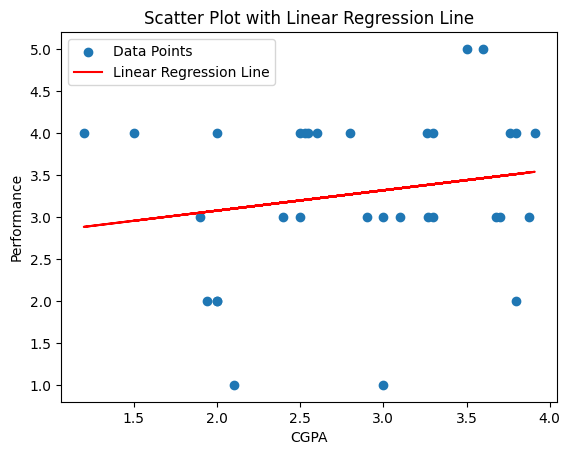

In [8]:
cgpa = df['CGPA'].values.reshape(-1, 1)
performance = df['Performance'].values.reshape(-1, 1)

model = LinearRegression()


model.fit(cgpa, performance)


predictions = model.predict(cgpa)


plt.scatter(cgpa, performance, label='Data Points')


plt.plot(cgpa, predictions, color='red', label='Linear Regression Line')


plt.xlabel('CGPA')
plt.ylabel('Performance')
plt.title('Scatter Plot with Linear Regression Line')
plt.legend()


plt.show()

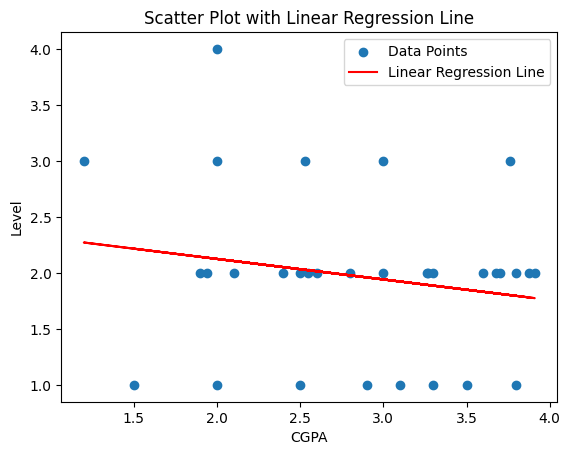

In [9]:
cgpa = df['CGPA'].values.reshape(-1, 1)
level = df['Level'].values.reshape(-1, 1)


model = LinearRegression()


model.fit(cgpa, level)


predictions = model.predict(cgpa)


plt.scatter(cgpa, level, label='Data Points')


plt.plot(cgpa, predictions, color='red', label='Linear Regression Line')


plt.xlabel('CGPA')
plt.ylabel('Level')
plt.title('Scatter Plot with Linear Regression Line')
plt.legend()


plt.show()

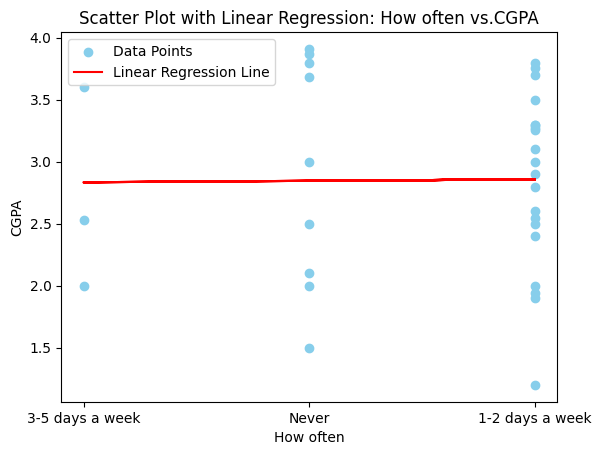

In [10]:
categories = df['How often'].unique()
category_labels = np.arange(len(categories))

df['How often'] = df['How often'].map(dict(zip(categories, category_labels)))


plt.scatter(df['How often'], df['CGPA'], color='skyblue', label='Data Points')


plt.xticks(category_labels, categories)
plt.xlabel('How often')
plt.ylabel('CGPA')
plt.title('Scatter Plot with Linear Regression: How often vs.CGPA')


model = LinearRegression()
X = df['How often'].values.reshape(-1, 1)
y = df['CGPA'].values
model.fit(X, y)


predictions = model.predict(X)


plt.plot(df['How often'], predictions, color='red', label='Linear Regression Line')


plt.legend()


plt.show()

<ipython-input-11-8524baca56e6>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df[1:].corr(), linewidths=1, linecolor='black', cmap=cmap,


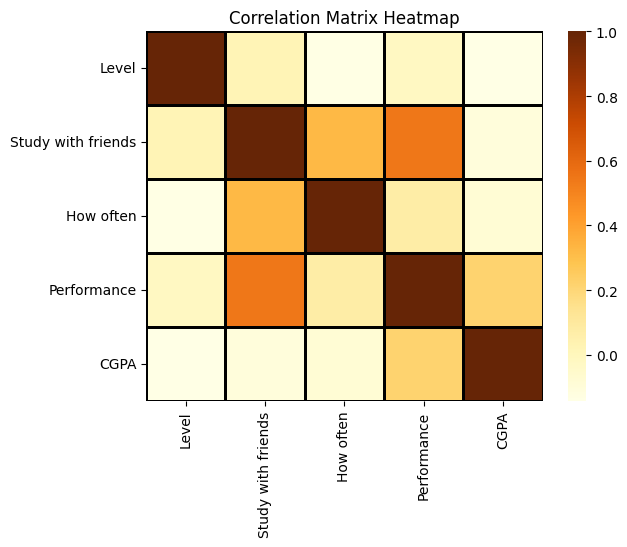

In [11]:
feature_names = ['Level', 'Study with friends', 'How often', 'Performance', 'CGPA']
cmap = sns.color_palette("YlOrBr", as_cmap=True)
sns.heatmap(df[1:].corr(), linewidths=1, linecolor='black', cmap=cmap,
            xticklabels=feature_names, yticklabels=feature_names)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [12]:
df.describe()

,Level,Study with friends,How often,Performance,CGPA
count,32.000000,32.000000,32.000000,32.000000,32.000000
mean,1.968750,0.625000,1.531250,3.281250,2.852281
std,0.739851,0.491869,0.671271,0.991394,0.757105
min,1.000000,0.000000,0.000000,1.000000,1.200000
25%,1.750000,0.000000,1.000000,3.000000,2.325000
50%,2.000000,1.000000,2.000000,3.000000,2.950000
75%,2.000000,1.000000,2.000000,4.000000,3.525000
max,4.000000,1.000000,2.000000,5.000000,3.910000


In [16]:
correlation = df['Performance'].corr(df['CGPA'])
print(correlation)

0.1847780300755038


In [17]:
correlation2 = df['Study with friends'].corr(df['CGPA'])
print(correlation2)

-0.12955522682769433
